Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


predicted.s1,observed
<dbl>,<dbl>
4.063388,4.097685
11.809043,10.560000
19.056911,17.502982
20.542628,37.564950
17.828747,20.224377
15.666158,10.499158
13.739529,7.743316
9.279539,8.901242
8.114568,11.361876


26 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 16.559847417
(Intercept)  .          
no.cellsK    .          
tn52         0.759589704
tn53         .          
inputng      .          
spri1        .          
sizeChic     0.008838484
yieldpguL   -0.040242792
percent1K    .          
bimodal1    -1.482217843
batch2      -0.675060079
batch3       7.805823668
batch4      15.866835493
batch5       .          
batch6       .          
batch7       .          
batch8       4.288854646
batch9       .          
batch10      .          
batch11      .          
batch12     -2.525967250
batch13      .          
batch14      1.677349690
batch15      .          
batch16      .          

[1] 43.07277

[1] 6.562985

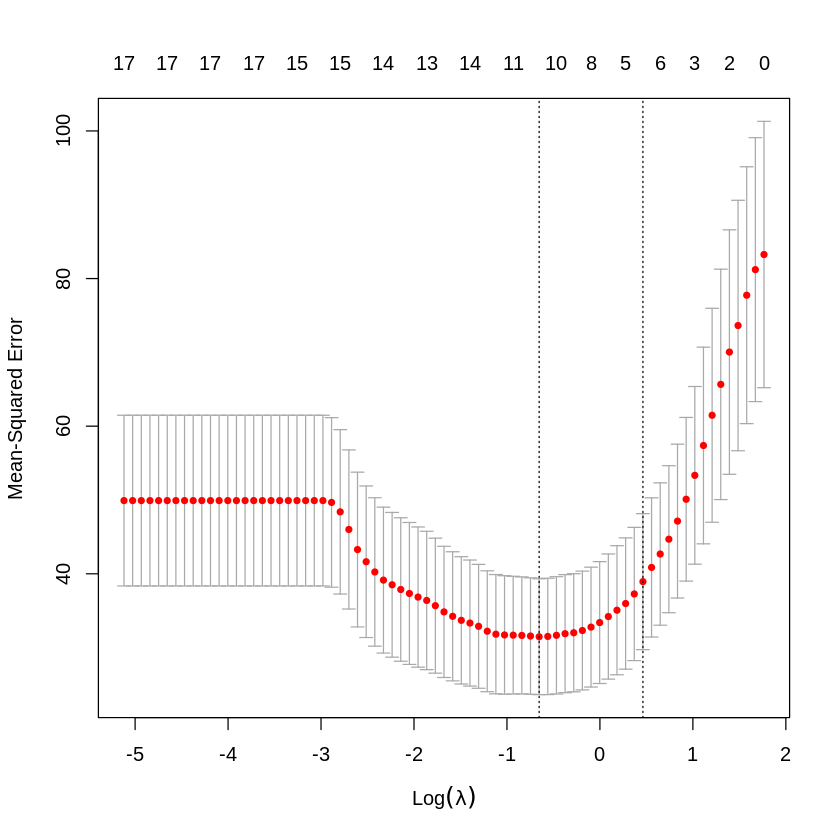

In [44]:
library(glmnet)
library(data.table)
setwd("~/HRJ_monocytes/Hackathon")
metrics <- fread("./captureMetrics.txt")

# first try a logistic lasso by splitting categorical variables up.
# some features are continuous and some categorical.

# Need to specify which ones are categorial.
metrics[, tn5 := as.factor(tn5)]
metrics[, spri := as.factor(spri)]
metrics[, bimodal := as.factor(bimodal)]
metrics[, batch := as.factor(batch)]

# Encode categorical variables using one-hot encoding. You can use the model.matrix function for this purpose.
# The data frame can contain both continuous and categorical variables.
encoded_data <- model.matrix(~., data = metrics)
#encoded_data

# split your data into training and testing sets (optional but recommended):
set.seed(123)  # For reproducibility
train_index <- sample(1:nrow(encoded_data), 0.7 * nrow(encoded_data))
train_data <- as.data.frame(encoded_data[train_index, ])
test_data <- as.data.frame(encoded_data[-train_index, ])

# Separate the response variable and predictor variables:
y_train <- train_data$efficiency
x_train <- as.matrix(train_data[, !names(train_data) %in% "efficiency"])
y_test <- test_data$efficiency
x_test <- as.matrix(test_data[, !names(test_data) %in% "efficiency"])

# Fit the Lasso regression model:
# Choose an appropriate lambda value using cross-validation
cvfit <- cv.glmnet(x_train, y_train, alpha=1)

#produce plot of test MSE by lambda value
plot(cvfit)

# Fit the Lasso model with the chosen lambda
lasso_model <- glmnet(x_train, y_train, alpha=1, lambda=cvfit$lambda.min)

# Predict on the test set
lasso_predictions <- predict(lasso_model, s=cvfit$lambda.min, newx=x_test)
predictions <- data.table(predicted = lasso_predictions, observed = test_data$efficiency)
predictions

# So what were the important variables?
# Get the coefficients from the Lasso model
coef_values <- coef(lasso_model, s = cvfit$lambda.min)
coef_values

# Calculate the squared error (MSE) of the Lasso predictions
mse <- mean((lasso_predictions - y_test)^2)
mse

# You can also calculate RMSE (Root Mean Squared Error) by taking the square root of MSE
rmse <- sqrt(mse)
rmse

#Applying Lasso in this specific case is not particuarly appropriate as a feature selection technic since 
#it treats the variables independently and hence ignores any relationship between them, in our
#case, it disregards the fact that the dummy variables, taken as a whole, represent the same 
#categorical variable.

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


predicted.s1,observed
<dbl>,<dbl>
21.267848,4.097685
38.749928,10.560000
19.978540,17.502982
22.836842,37.564950
16.826402,20.224377
11.253298,10.499158
9.009232,7.743316
6.384616,8.901242
7.208041,11.361876


11 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) -20.25026418
(Intercept)   .         
no.cellsK    -0.03435065
tn52          5.32157695
tn53          3.35485646
inputng       0.02257917
spri1        11.39672395
sizeChic      0.05981972
yieldpguL    -0.03165573
percent1K     0.16547771
bimodal1     -3.41600416

[1] 127.6327

[1] 11.29746

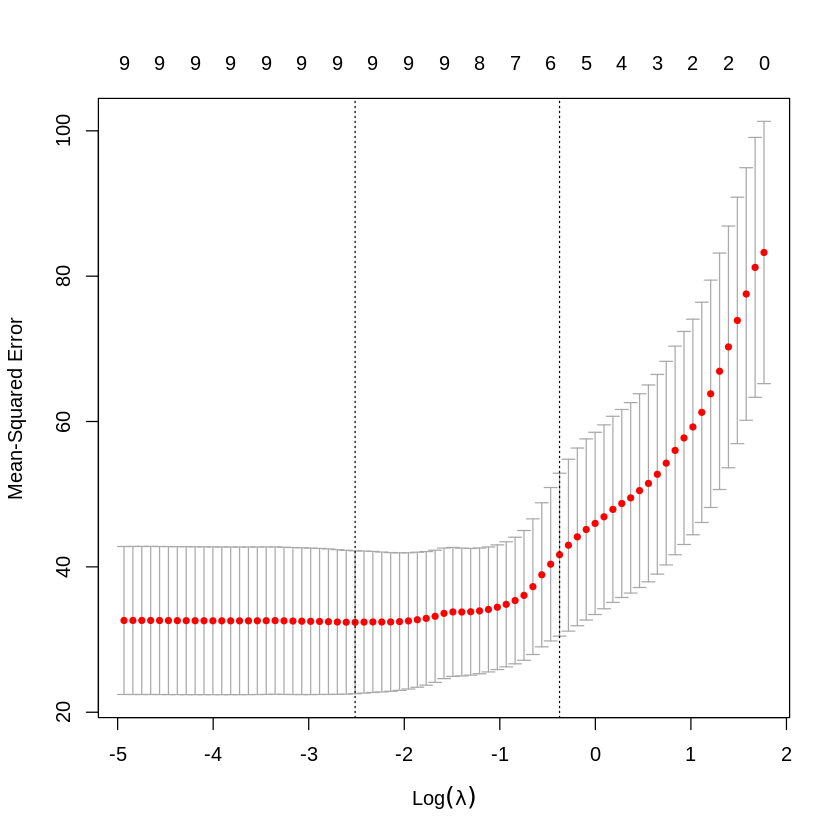

In [45]:
# Try without batch
metrics_continous <- metrics[, batch := NULL]
encoded_data <- model.matrix(~., data = metrics_continous)
#encoded_data

# split your data into training and testing sets (optional but recommended):
set.seed(123)  # For reproducibility
train_index <- sample(1:nrow(encoded_data), 0.7 * nrow(encoded_data))
train_data <- as.data.frame(encoded_data[train_index, ])
test_data <- as.data.frame(encoded_data[-train_index, ])

# Separate the response variable and predictor variables:
y_train <- train_data$efficiency
x_train <- as.matrix(train_data[, !names(train_data) %in% "efficiency"])
y_test <- test_data$efficiency
x_test <- as.matrix(test_data[, !names(test_data) %in% "efficiency"])

# Fit the Lasso regression model:
# Choose an appropriate lambda value using cross-validation
cvfit <- cv.glmnet(x_train, y_train, alpha=1)

#produce plot of test MSE by lambda value
plot(cvfit)

# Fit the Lasso model with the chosen lambda
lasso_model <- glmnet(x_train, y_train, alpha=1, lambda=cvfit$lambda.min)

# Predict on the test set
lasso_predictions <- predict(lasso_model, s=cvfit$lambda.min, newx=x_test)
predictions <- data.table(predicted = lasso_predictions, observed = test_data$efficiency)
predictions

# So what were the important variables?
# Get the coefficients from the Lasso model
coef_values <- coef(lasso_model, s = cvfit$lambda.min)
coef_values

# Calculate the squared error (MSE) of the Lasso predictions
mse <- mean((lasso_predictions - y_test)^2)
mse

# You can also calculate RMSE (Root Mean Squared Error) by taking the square root of MSE
rmse <- sqrt(mse)
rmse


Warning message in `[.data.table`(metrics, , `:=`(c("batch", "tn5", "no.cellsK", :
“Column 'batch' does not exist to remove”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


predicted.s1,observed
<dbl>,<dbl>
4.796676,4.097685
14.996161,10.560000
21.146656,17.502982
22.429324,37.564950
20.200426,20.224377
18.464444,10.499158
16.520642,7.743316
10.475284,8.901242
9.107280,11.361876


6 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 26.50862672
(Intercept)  .         
sizeChic     .         
yieldpguL   -0.05256834
percent1K    .         
bimodal1    -1.26286709

[1] 42.73178

[1] 6.536955

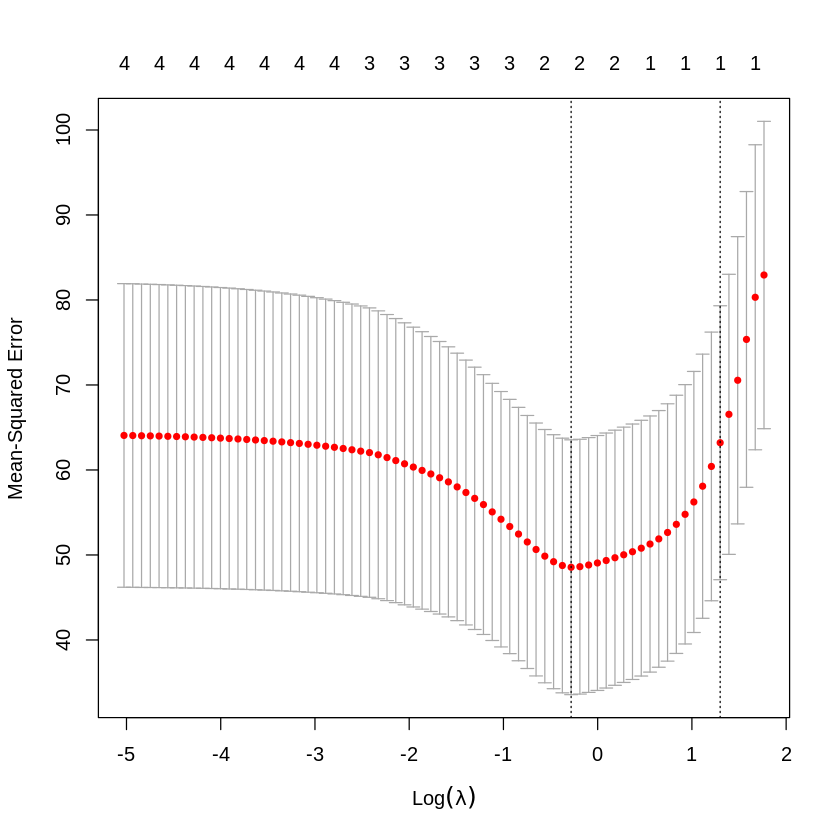

In [46]:
# Try only using tapestation metrics
metrics_tapestation <- metrics[, c("batch", "tn5", "no.cellsK", "inputng", "spri") := NULL]
encoded_data <- model.matrix(~., data = metrics_tapestation)
#encoded_data

# split your data into training and testing sets (optional but recommended):
set.seed(123)  # For reproducibility
train_index <- sample(1:nrow(encoded_data), 0.7 * nrow(encoded_data))
train_data <- as.data.frame(encoded_data[train_index, ])
test_data <- as.data.frame(encoded_data[-train_index, ])

# Separate the response variable and predictor variables:
y_train <- train_data$efficiency
x_train <- as.matrix(train_data[, !names(train_data) %in% "efficiency"])
y_test <- test_data$efficiency
x_test <- as.matrix(test_data[, !names(test_data) %in% "efficiency"])

# Fit the Lasso regression model:
# Choose an appropriate lambda value using cross-validation
cvfit <- cv.glmnet(x_train, y_train, alpha=1)

#produce plot of test MSE by lambda value
plot(cvfit)

# Fit the Lasso model with the chosen lambda
lasso_model <- glmnet(x_train, y_train, alpha=1, lambda=cvfit$lambda.min)

# Predict on the test set
lasso_predictions <- predict(lasso_model, s=cvfit$lambda.min, newx=x_test)
predictions <- data.table(predicted = lasso_predictions, observed = test_data$efficiency)
predictions

# So what were the important variables?
# Get the coefficients from the Lasso model
coef_values <- coef(lasso_model, s = cvfit$lambda.min)
coef_values

# Calculate the squared error (MSE) of the Lasso predictions
mse <- mean((lasso_predictions - y_test)^2)
mse

# You can also calculate RMSE (Root Mean Squared Error) by taking the square root of MSE
rmse <- sqrt(mse)
rmse